Mean Squared Error: 5192.417833338407
R-squared: 0.0012847207508352998


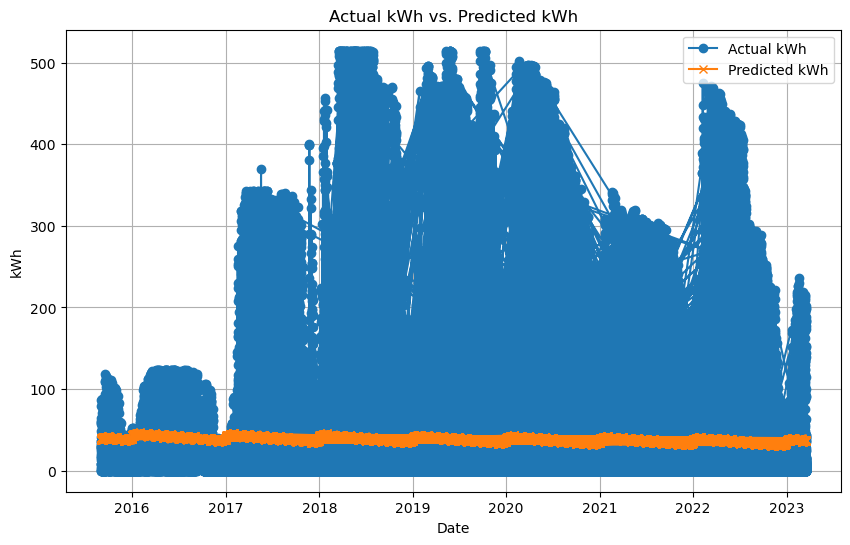

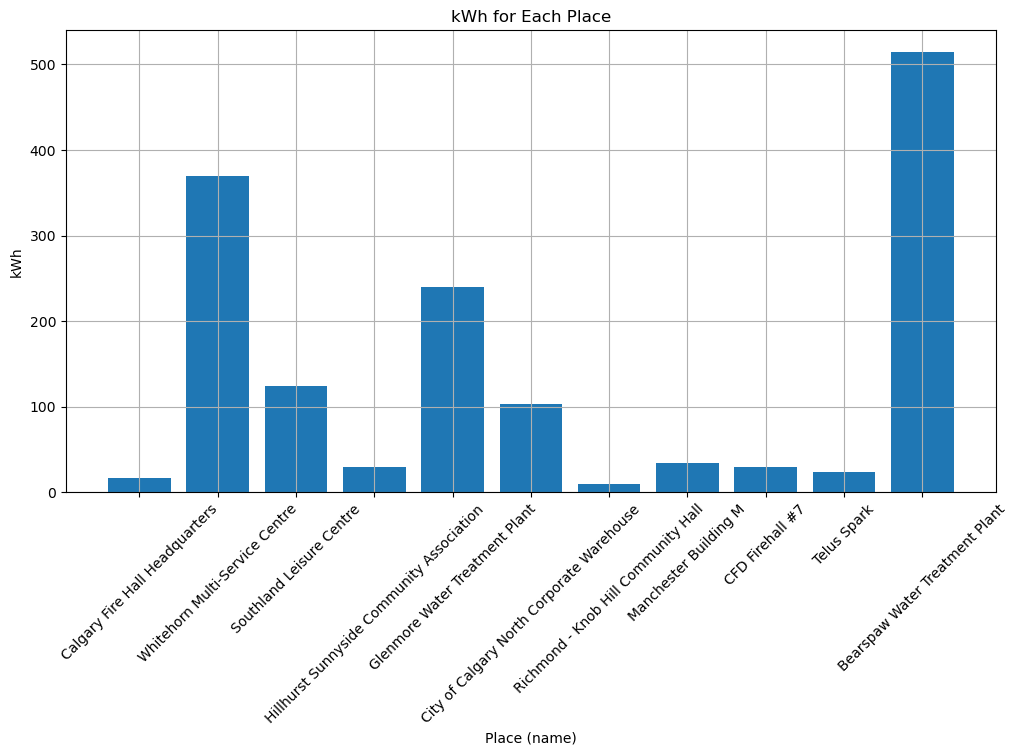

C:\Users\shash\AppData\Local\Temp\ipykernel_9920\1676518379.py:64: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hourly_data = data.resample('H', on='date').sum()


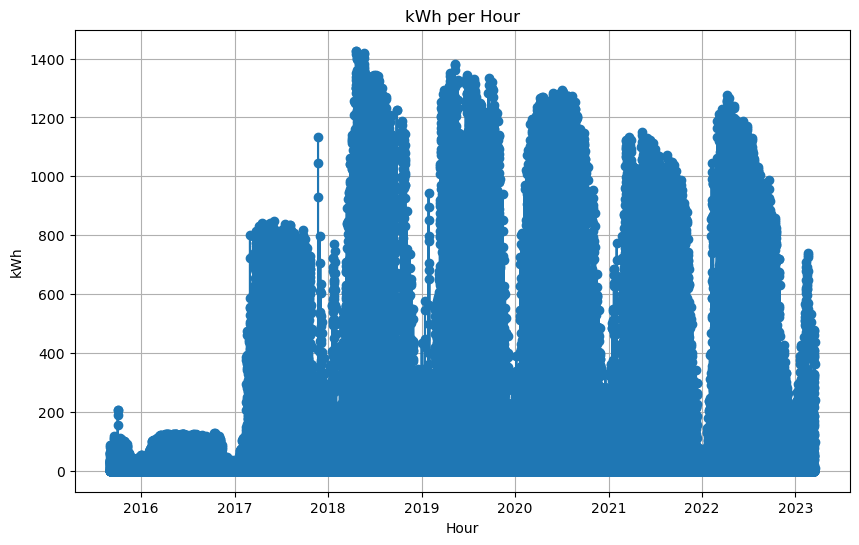

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the data from the CSV file
data = pd.read_csv("Solar_Energy_Production.csv")

# Convert the 'date' column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Extract the year, month, day, and hour from the 'date' column
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour

# Separate features and target variable
X = data[['year', 'month', 'day', 'hour']]
y = data['kWh']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the actual kWh vs. predicted kWh using a line chart
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['kWh'], label='Actual kWh', marker='o')
plt.plot(data['date'], model.predict(data[['year', 'month', 'day', 'hour']]), label='Predicted kWh', marker='x')
plt.xlabel('Date')
plt.ylabel('kWh')
plt.title('Actual kWh vs. Predicted kWh')
plt.legend()
plt.grid(True)
plt.show()

# Create a bar chart for kWh vs. Place (name)
plt.figure(figsize=(12, 6))
plt.bar(data['name'], data['kWh'])
plt.xlabel('Place (name)')
plt.ylabel('kWh')
plt.title('kWh for Each Place')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Aggregate data to hourly intervals and create line chart for kWh per hour
hourly_data = data.resample('H', on='date').sum()
plt.figure(figsize=(10, 6))
plt.plot(hourly_data.index, hourly_data['kWh'], marker='o', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('kWh')
plt.title('kWh per Hour')
plt.grid(True)
plt.show()
